In [1]:
import pandas as pd
import os as os
import json as json
import ast
import pickle
import openpyxl

In [2]:
patient_safety_df = pd.read_pickle('../fda_data/parsed_data/patient_safety_2015.pk')

In [ ]:
patient_safety_df

In [5]:
col_names = ['MedDRA Code', 'MedDRA LLT', 'SNOMED CT CODE', 'SNOMED CT FSN', 'CANCER GROUP'] 

# mapping of MedDRA Codes to Cancer Groups
meddra_mapping_df = pd.read_excel(
    '../fda_data/MedDRA_Mapping_with_Cancer_Group_Breast_Identified.xlsx',
    engine='openpyxl',
    names = col_names
)

In [6]:
meddra_mapping_df['CANCER GROUP'].unique()

array(['Cancer Group', nan, 'Leukemia', 'Other Cancer', 'Stomach', 'Lung',
       'Lymphoma', 'Breast', 'Colorectal', 'Melanoma', 'Pancreatic'],
      dtype=object)

In [46]:
# Step 1: Explode the list of string indications
exploded_df = patient_safety_df.explode('indications')

# Step 2: Convert indications to int for matching
meddra_mapping_df['MedDRA Code'] = meddra_mapping_df['MedDRA Code'].astype(str)

# Step 3: Merge with meddra_mapping_df on the MedDRA code
merged_df = exploded_df.merge(
    meddra_mapping_df,
    left_on='indications',
    right_on='MedDRA Code',
    how='left'
)

In [48]:
merged_df['CANCER GROUP'].unique()

array([nan, 'Other Cancer', 'Breast', 'Leukemia', 'Melanoma', 'Lymphoma',
       'Colorectal', 'Lung', 'Pancreatic', 'Stomach'], dtype=object)

In [49]:
# Step 4: Group by original index and get first non-null cancer type
cancer_type_map = merged_df.groupby(merged_df.index)['CANCER GROUP'].agg(lambda x: next((i for i in x if pd.notna(i)), None))

# Step 5: Add cancer type to original patient_safety_df
patient_safety_df['CANCER GROUP'] = patient_safety_df.index.map(cancer_type_map)

In [50]:
patient_safety_df['CANCER GROUP'].unique()

array([None, 'Other Cancer', 'Breast', 'Leukemia', 'Melanoma', 'Lymphoma',
       'Colorectal', 'Lung', 'Pancreatic', 'Stomach'], dtype=object)

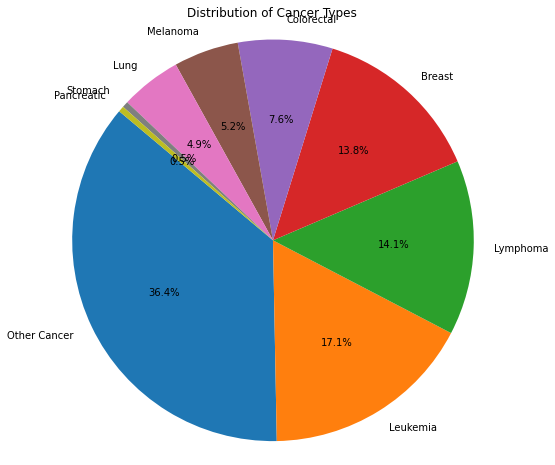

In [54]:
import matplotlib.pyplot as plt
cancer_counts = patient_safety_df['CANCER GROUP'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cancer_counts, labels=cancer_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cancer Types')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

In [20]:
meddra_mapping_df['CANCER GROUP'].unique()

array(['Cancer Group', nan, 'Leukemia', 'Other Cancer', 'Stomach', 'Lung',
       'Lymphoma', 'Breast', 'Colorectal', 'Melanoma', 'Pancreatic'],
      dtype=object)

In [56]:
breast_cancer_codes = meddra_mapping_df[meddra_mapping_df['CANCER GROUP'] == 'Breast']['MedDRA Code'].unique()

In [57]:
breast_cancer_codes = [str(code) for code in breast_cancer_codes]

In [59]:
meddra_mapping_df[meddra_mapping_df['CANCER GROUP'] == 'Breast']

,MedDRA Code,MedDRA LLT,SNOMED CT CODE,SNOMED CT FSN,CANCER GROUP
680,10006173,Breast adenocarcinoma,865954003,Adenocarcinoma of breast (disorder),Breast
681,10006187,Breast cancer,254837009,Malignant neoplasm of breast (disorder),Breast
682,10006188,Breast cancer female NOS,372064008,Malignant neoplasm of female breast (disorder),Breast
683,10006190,Breast cancer invasive NOS,713609000,Invasive carcinoma of breast (disorder),Breast
684,10006192,Breast cancer NOS,254837009,Malignant neoplasm of breast (disorder),Breast
685,10006198,Breast cancer recurrent,314955001,Local recurrence of malignant tumor of breast ...,Breast
686,10006200,Breast cancer stage II,372137005,Primary malignant neoplasm of breast (disorder),Breast
687,10006201,Breast cancer stage III,372137005,Primary malignant neoplasm of breast (disorder),Breast
688,10006202,Breast cancer stage IV,372137005,Primary malignant neoplasm of breast (disorder),Breast
692,10006235,Breast ductal cancer infiltrating,408643008,Infiltrating duct carcinoma of breast (disorder),Breast


In [65]:
breast_cancer_df = patient_safety_df[patient_safety_df['CANCER GROUP']=='Breast']

In [66]:
patient_safety_df['CANCER GROUP'].unique()

array([None, 'Other Cancer', 'Breast', 'Leukemia', 'Melanoma', 'Lymphoma',
       'Colorectal', 'Lung', 'Pancreatic', 'Stomach'], dtype=object)

In [67]:
for el in breast_cancer_df['SE']:
    if len(el) > 0:
        print(el)

['10067585']
['10011077']
['10000891']
['10011078', '10028596']
['10008190', '10011078']
['10028596']
['10028596']
['10028596']
['10042434', '10051592']
['10006279', '10044034']
['10016288', '10031264', '10061188']
['10007559']
['10007559']
['10007559']
['10011078']
['10034839']
['10012735', '10028813', '10037660', '10060769', '10073069']
['10008469', '10013709', '10043417', '10069327']
['10007559', '10037423', '10061024']
['10002424', '10015150', '10046735']
['10002034', '10011224', '10020578', '10020903', '10037087', '10047942', '10054889']
['10002974', '10006093', '10006475', '10028810', '10033318']
['10003553', '10004446', '10006298', '10007695', '10011878', '10012378', '10023003', '10027457', '10027459', '10029148', '10033609', '10039722', '10040979', '10041660', '10046571', '10067434', '10068067']
['10054112', '10076308']
['10010264', '10013709', '10016322', '10033371', '10039073']
['10013654', '10022524', '10050012']
['10061334']
['10011224', '10022061', '10022093', '10052251', 

['10022061', '10037087']
['10021789']
['10012174']
['10000059', '10013573', '10061164']
['10005003']
['10039424']
['10040108']
['10013036', '10020937', '10027175', '10028334', '10046543', '10048393', '10061425']
['10028245', '10033892', '10046543']
['10047942']
['10003239', '10018627']
['10011906']
['10001949', '10008196', '10012373', '10012378', '10013710', '10019063', '10022437', '10027951', '10029412', '10033664', '10036316', '10040108', '10041347', '10042458', '10042772', '10047340', '10047571', '10061422', '10061920', '10070863']
['10005003']
['10012735', '10019211', '10028813']
['10015993', '10024570']
['10033371', '10037153', '10037867', '10040831', '10062355']
['10005003']
['10013709']
['10037844']
['10033371']
['10054112']
['10013968']
['10055798', '10060933']
['10019133']
['10011906']
['10069326', '10069327']
['10006002']
['10029354']
['10050513', '10061818']
['10013700', '10037844', '10046735']
['10000081', '10007515', '10017533', '10017866', '10017955', '10017982', '1004007

['10012174', '10013573']
['10012735', '10047895', '10073071']
['10046735']
['10013916', '10019301']
['10028997']
['10040829', '10047531']
['10001507', '10002961', '10013709', '10018852', '10018884', '10020642', '10028533', '10028537', '10029354', '10033661', '10037549', '10043554', '10057528', '10058529']
['10012735', '10012735', '10049151', '10049151', '10049151']
['10011906']
['10025482', '10048393', '10060933']
['10003988', '10016256', '10022061', '10022075', '10022078', '10022112', '10023198', '10037660', '10047184', '10061425']
['10013709', '10073954']
['10000059', '10017853']
['10024384', '10029354', '10049947', '10051792']
['10033661']
['10016173', '10020100', '10043607']
['10025016', '10033295', '10033371', '10038979', '10043121', '10053762']
['10008111']
['10022004', '10040047']
['10002556', '10003239', '10022061', '10022112', '10028372', '10028411', '10049816', '10061521', '10066044', '10072005']
['10000087', '10003239', '10013946', '10015137', '10019211', '10020039', '100244

['10064355']
['10022086', '10047571']
['10005557', '10013952']
['10005557', '10033371', '10057362']
['10057362']
['10057362']
['10005557']
['10064355']
['10005557']
['10064355']
['10007739']
['10057362']
['10012378', '10027940', '10042458']
['10005750', '10020751', '10037844']
['10005724']
['10007554', '10036018', '10065553']
['10005750', '10013573', '10042772', '10053615', '10061019', '10069363']
['10020937', '10028334', '10048865']
['10003239', '10022437', '10028836', '10033371', '10033425']
['10008629', '10029148']
['10037884']
['10011906']
['10022061', '10022067', '10022111']
['10013573', '10016322']
['10001946', '10020937']
['10005557']
['10022437', '10033425', '10058920']
['10033318', '10038695', '10041349']
['10021263']
['10011906']
['10047531']
['10013709']
['10005750', '10016173', '10025482', '10033425']
['10013709', '10049470', '10051572']
['10049470']
['10002855', '10019079', '10029366', '10039626', '10047942']
['10005555', '10005557', '10025482', '10052897']
['10007739', '1

['10030124']
['10025382']
['10008190', '10014513']
['10001551', '10002034', '10011224', '10013952', '10020947', '10024642', '10027091', '10036975', '10037660', '10041349', '10047942', '10062237', '10068319']
['10002034', '10002544', '10002855', '10003549', '10005425', '10005750', '10012378', '10012735', '10013538', '10016256', '10016766', '10016970', '10019211', '10020937', '10021021', '10022000', '10022437', '10023232', '10024453', '10024570', '10025482', '10027599', '10028372', '10033425', '10036436', '10040753', '10043242', '10044565', '10047700', '10047895', '10047899', '10048959', '10050296', '10056819', '10061246', '10062132', '10066995', '10075049']
['10000087', '10011224', '10011781', '10013786', '10018884', '10025482', '10029366', '10035528', '10037660']
['10000636', '10015090', '10022595', '10056335']
['10003119']
['10009137', '10022000', '10061372']
['10002855', '10003549', '10008531', '10012374', '10013573', '10016256', '10016334', '10019211', '10025482', '10027175', '10028

['10020751']
['10001297', '10008190', '10010947', '10013887', '10019465', '10028335', '10049848', '10054197', '10062060', '10067672']
['10057362', '10069327']
['10001760', '10012455', '10020568', '10028334', '10028391', '10041303', '10048886']
['10005734', '10022523', '10029458', '10041349', '10042464', '10047700']
['10021097', '10061105']
['10013709', '10074902']
['10011906']
['10050296']
['10019075', '10020772', '10037087', '10037844', '10061921']
['10013709']
['10013709']
['10013781']
['10003239', '10033425']
['10074903']
['10027757']
['10076308', '10076309']
['10000081', '10016256']
['10000077', '10000081', '10012735', '10037660']
['10000087', '10003549', '10028334', '10028411', '10041349', '10044565', '10047895', '10061428']
['10016256', '10035664', '10061024']
['10003225', '10008479', '10013710', '10025310', '10047700', '10051398']
['10044074']
['10007617', '10013700', '10037087', '10037377', '10037515', '10037884', '10042033', '10044223', '10068319']
['10016173', '10033371']
['1

['10011906', '10049438']
['10001488', '10001760', '10002855', '10003239', '10005910', '10006784', '10008531', '10010305', '10013496', '10013916', '10013968', '10014020', '10015946', '10016256', '10016322', '10018884', '10019194', '10019211', '10020937', '10022437', '10022998', '10024855', '10027374', '10029223', '10029354', '10033371', '10033664', '10033775', '10039906', '10041466', '10043882', '10044565', '10060800', '10061046', '10061334']
['10000087', '10000133', '10001497', '10016100', '10020751', '10025482', '10037211', '10038743', '10040984']
['10024774']
['10010774', '10012735', '10020039', '10028334', '10028813', '10047700', '10047700', '10048959']
['10013968', '10013971', '10025482', '10037377']
['10020947', '10021027']
['10000891', '10003239', '10006451', '10007687', '10011078', '10013911', '10019211', '10025482', '10028596', '10029148', '10038381', '10039674', '10040753', '10047924', '10050584', '10056871', '10074903']
['10000804', '10003445', '10023126', '10047216', '100532

In [ ]:
filtered_df = patient_safety_df[
    patient_safety_df['indications'].apply(lambda codes: any(code in breast_cancer_codes for code in codes))
]

In [37]:
filtered_df.to_csv('../fda_data/breast_cancer_patient_safety.csv')

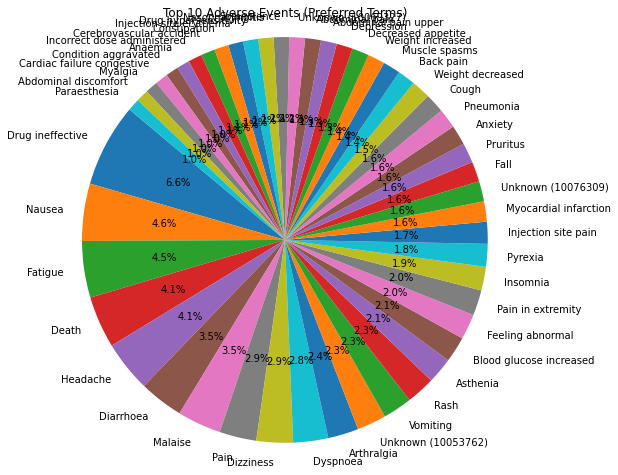

In [74]:
import ast
from collections import Counter
import matplotlib.pyplot as plt
breast_safety_df = breast_cancer_df

def safe_parse(val):
    try:
        parsed = ast.literal_eval(val) if isinstance(val, str) else val
        return parsed if isinstance(parsed, list) else []
    except:
        return []

breast_safety_df.loc[:, 'SE'] = breast_safety_df['SE'].apply(safe_parse)

# Step 2: Flatten all MedDRA codes from the SE column
all_se_codes = [
    code for sublist in breast_safety_df['SE'] 
    if isinstance(sublist, list) 
    for code in sublist
]

# Step 3: Count occurrences
se_counter = Counter(all_se_codes)

# Step 4: Map MedDRA codes to LLTs
meddra_mapping_df['MedDRA Code'] = meddra_mapping_df['MedDRA Code'].astype(str)
llt_mapping = dict(zip(meddra_mapping_df['MedDRA Code'], meddra_mapping_df['MedDRA LLT']))

llt_counter = {}
for code, count in se_counter.items():
    term = llt_mapping.get(code, f"Unknown ({code})")
    llt_counter[term] = llt_counter.get(term, 0) + count

# Step 5: Plot top 10 LLTs
top_terms = dict(sorted(llt_counter.items(), key=lambda x: x[1], reverse=True)[:50])

plt.figure(figsize=(8, 8))
plt.pie(top_terms.values(), labels=top_terms.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Adverse Events (Preferred Terms)')
plt.axis('equal')
plt.show()


In [68]:
filtered_df['SE'].to_list()

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [64]:
all_se_codes

[]

In [8]:
patient_safety_df['drugs'].unique()

array(['[]', "['DB00005']", "['DB00399', 'DB00399', 'DB00399']", ...,
       "['DB00264', 'DB00264', 'DB00264', 'DB00327', 'DB00641', 'DB00700', 'DB00700', 'DB01050', 'DB09292']",
       "['DB00153', 'DB01373', 'DB05829', 'DB05829', 'DB05829']",
       "['DB00169', 'DB00193', 'DB00343', 'DB00404', 'DB00480', 'DB00480', 'DB00480', 'DB00480', 'DB01076']"],
      dtype=object)

In [17]:
patient_safety_df['indications'].unique()

array(['[]', "['10039073']", "['10058467', '10059515', '10059515']", ...,
       "['10010428', '10010428', '10010428', '10037660']",
       "['10002091', '10007649', '10007649', '10007649', '10029173', '10064736', '10070592']",
       "['10012438', '10012438', '10012438', '10012438', '10012438', '10012438', '10012438', '10012438', '10012438', '10012438', '10077512', '10077512', '10077512']"],
      dtype=object)

In [5]:
patient_safety_df['drugs']

0                                                    []
1                                                    []
2                                                    []
3                                                    []
4                                                    []
                               ...                     
9325726                                     ['DB00182']
9325727                                     ['DB01050']
9325728                                     ['DB01281']
9325729                                     ['DB00497']
9325730    ['DB00295', 'DB00327', 'DB00497', 'DB00497']
Name: drugs, Length: 9325731, dtype: object

In [10]:
ae_mapping_df = pd.read_csv('../fda_data/covid_study_preprocessed_data/AE_mapping.csv', sep='\t')

In [11]:
ae_mapping_df

,PT,PT_name,HLT,HLT_name,HLGT,HLGT_name,SOC,SOC_name,SOC_abbr
0,10000002,11-beta-hydroxylase deficiency,10021608,inborn errors of steroid synthesis,10027424,metabolic and nutritional disorders congenital,10010331,"congenital, familial and genetic disorders",Cong
1,10000005,17 ketosteroids urine,10038589,reproductive hormone analyses,10014706,endocrine investigations (incl sex hormones),10022891,investigations,Inv
2,10000007,17 ketosteroids urine decreased,10038589,reproductive hormone analyses,10014706,endocrine investigations (incl sex hormones),10022891,investigations,Inv
3,10000009,17 ketosteroids urine increased,10038589,reproductive hormone analyses,10014706,endocrine investigations (incl sex hormones),10022891,investigations,Inv
4,10000011,17 ketosteroids urine normal,10038589,reproductive hormone analyses,10014706,endocrine investigations (incl sex hormones),10022891,investigations,Inv
...,...,...,...,...,...,...,...,...,...
24308,10084459,asymptomatic covid-19,10084510,coronavirus infections,10047438,viral infectious disorders,10021881,infections and infestations,Infec
24309,10084460,covid-19 treatment,10002790,antiinfective therapies,10043413,therapeutic procedures and supportive care nec,10042613,surgical and medical procedures,Surg
24310,10084461,sars-cov-2 carrier,10021910,infectious disorders carrier,10002252,ancillary infectious topics,10021881,infections and infestations,Infec
24311,10084468,quarantine,10027700,therapeutic procedures nec,10043413,therapeutic procedures and supportive care nec,10042613,surgical and medical procedures,Surg


In [13]:
drug_atc_mapping_df = pd.read_csv('../fda_data/covid_study_preprocessed_data/drug_ATC_mapping.csv', sep='\t')

In [23]:
drug_atc_mapping_df.columns.to_list()

['DBID',
 'ATC_Subclass_1',
 'ATC_ATC_Subclass_2',
 'Subclass_4',
 'ATC_Subclass_3',
 'ATC_Class',
 'string_name',
 'FAERScode']

In [24]:
drug_atc_mapping_df.head()

,DBID,ATC_Subclass_1,ATC_ATC_Subclass_2,Subclass_4,ATC_Subclass_3,ATC_Class,string_name,FAERScode
0,DB00001,Direct thrombin inhibitors,ANTITHROMBOTIC AGENTS,ANTITHROMBOTIC AGENTS,BLOOD AND BLOOD FORMING ORGANS,BLOOD AND BLOOD FORMING ORGANS,lepirudin,0.0
1,DB00002,Monoclonal antibodies,OTHER ANTINEOPLASTIC AGENTS,ANTINEOPLASTIC AGENTS,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,cetuximab,1.0
2,DB00003,Mucolytics,"EXPECTORANTS, EXCL. COMBINATIONS WITH COUGH SUPPRESSANTS",COUGH AND COLD PREPARATIONS,RESPIRATORY SYSTEM,RESPIRATORY SYSTEM,dornase alfa,2.0
3,DB00004,Other antineoplastic agents,OTHER ANTINEOPLASTIC AGENTS,ANTINEOPLASTIC AGENTS,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,denileukin diftitox,3.0
4,DB00005,Tumor necrosis factor alpha (TNF-Œ±) inhibitors,IMMUNOSUPPRESSANTS,IMMUNOSUPPRESSANTS,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,etanercept,4.0


In [21]:
import pandas as pd

# Set display options
pd.set_option('display.max_rows', None)         # Show all rows
pd.set_option('display.max_colwidth', None)     # Show full column content
pd.set_option('display.expand_frame_repr', False)

# Now print the full list
print(drug_atc_mapping_df['string_name'].to_list())

['lepirudin', 'cetuximab', 'dornase alfa', 'denileukin diftitox', 'etanercept', 'bivalirudin', 'leuprolide', 'leuprolide', 'peginterferon alfa-2a', 'peginterferon alfa-2a', 'alteplase', 'alteplase', 'sermorelin', 'sermorelin', 'interferon alfa-n1', 'darbepoetin alfa', 'urokinase', 'goserelin', 'reteplase', 'erythropoietin', nan, 'pegfilgrastim', 'sargramostim', 'peginterferon alfa-2b', 'peginterferon alfa-2b', nan, 'thyrotropin alfa', nan, 'anakinra', nan, nan, 'insulin human', 'insulin human', 'insulin human', 'insulin human', 'insulin human', 'tenecteplase', 'menotropins', nan, 'desmopressin', 'coagulation factor viia recombinant human', 'oprelvekin', 'palifermin', 'glucagon', 'aldesleukin', nan, 'omalizumab', 'lutropin alfa', 'insulin lispro', 'insulin lispro', 'insulin lispro', 'insulin glargine', 'insulin glargine', 'collagenase clostridium histolyticum', 'collagenase clostridium histolyticum', 'collagenase clostridium histolyticum', 'rasburicase', 'rasburicase', 'cetrorelix', 'ad

In [14]:
drug_atc_mapping_df['ATC_Subclass_1'].unique()

array(['Direct thrombin inhibitors', 'Monoclonal antibodies',
       'Mucolytics', 'Other antineoplastic agents',
       'Tumor necrosis factor alpha (TNF-Œ±) inhibitors',
       'Gonadotropin releasing hormone analogues', 'Interferons',
       'Enzymes', 'Other ophthalmologicals',
       'Tests for pituitary function',
       'Somatropin and somatropin agonists',
       'Other antianemic preparations', 'Calcitonin preparations',
       'Colony stimulating factors', 'Thyrotropin',
       'Blood coagulation factors', 'Interleukin inhibitors',
       'Antibiotics',
       'Insulins and analogues for injection, intermediate-acting',
       'Insulins and analogues for injection, long-acting',
       'Insulins and analogues for injection, fast-acting',
       'Insulins and analogues for injection, intermediate- or long-acting combined with fast-acting',
       'Insulins and analogues for inhalation', 'Gonadotropins',
       'Vasopressin and analogues', 'Interleukins',
       'Detoxifying ag

In [15]:
drug_mapping_df = pd.read_csv('../fda_data/drug_mapping.csv', sep='\t')

In [16]:
drug_mapping_df

,Drug,DrugBank ID
0,etanercept,DB00005
1,zoledronic acid,DB00399
2,atorvastatin,DB01076
3,metformin,DB00331
4,rosiglitazone,DB00412
...,...,...
3619,methylatropine,DB13833
3620,fosfructose,DB13863
3621,gluconic acid,DB13180
3622,pentolinium,DB01090
